In [73]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, linregress, pearsonr
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [9]:
# Impact of Outliers
# Creating dataset with outliers
data = [10, 12, 14, 15, 17, 18, 22, 24, 100] # It contains an outlier as (100)

In [17]:
# Calculating mean, median and mode with outliers
mean_with_outlier = np.mean(data)
median_with_outlier = np.median(data)
print(f"Mean with outlier: {mean_with_outlier}")
print(f"Median with outlier: {median_with_outlier}")

Mean with outlier: 25.77777777777778
Median with outlier: 17.0


In [19]:
# Removing the Outlier
data_without_outlier = data[:-1]
mean_without_outlier = np.mean(data_without_outlier)
median_without_outlier = np.median(data_without_outlier)
print(f"Mean without outlier: {mean_without_outlier}")
print(f"Median without outlier: {median_without_outlier}")

Mean without outlier: 16.5
Median without outlier: 16.0


In [21]:
# Measures of Central Tendency
# Dataset for test scores
test_scores = [56, 67, 70, 65, 80, 92, 70, 76, 73, 88]

# Calculating mean, median and mode
mean_score = np.mean(test_scores)
median_score = np.median(test_scores)
mode_score = max(set(test_scores), key=test_scores.count)

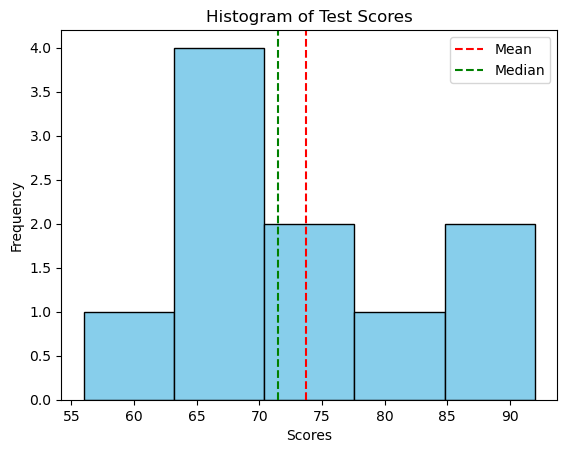

In [23]:
# Plotting Histogram
plt.hist(test_scores, bins=5, color='skyblue', edgecolor='black')
plt.axvline(mean_score, color='red', linestyle='dashed', label='Mean')
plt.axvline(median_score, color='green', linestyle='dashed', label='Median')
plt.legend()
plt.title("Histogram of Test Scores")
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.show()

In [37]:
# Measures of Dispersion
# Calculating Range, IQR, Variance and Standard Deviation
range_val = max(test_scores) - min(test_scores)
q1, q3 =np.percentile(test_scores, [25, 75])
iqr = q3 - q1
variance = np.var(test_scores)
std_dev = np.std(test_scores)
print (f"Range:{range_val}, IQR: {iqr}, Variance:{variance}, Std Dev:{std_dev}")

Range:36, IQR: 11.25, Variance:104.60999999999999, Std Dev:10.227903010881555


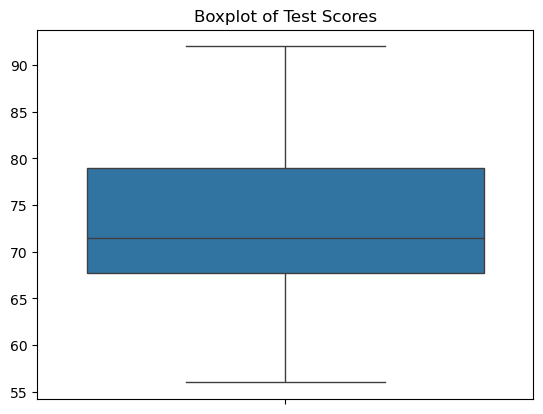

In [39]:
# Plotting Boxplot
sns.boxplot(test_scores)
plt.title("Boxplot of Test Scores")
plt.show()

In [47]:
# Hypothesis Testing
# Scores before and after
before_scores = [55, 60, 65, 70, 75]
after_scores = [65, 70, 75, 80, 85]

# paired t-test
t_stat, p_value = ttest_rel(before_scores, after_scores)
print(f"T-Statistic: {t_stat}, P-value:{p_value}")
if p_value < 0.05:
    print("Significant Improvement Due To The Programe!")
else:
    print("No Significant Improvement Seen.")
    

T-Statistic: -inf, P-value:0.0
Significant Improvement Due To The Programe!


In [51]:
# Types of Errors
# Creating synthetic data
true_null_hypothesis = np.random.normal(50, 5, 100)
false_null_hypothesis = np.random.normal(60, 5, 100)

# Performing tests to simulate Type I and Type II errors
type1_error = ttest_rel(true_null_hypothesis, false_null_hypothesis).pvalue < 0.05
type2_error = ttest_rel(false_null_hypothesis, true_null_hypothesis).pvalue 

print(f"Type I Error:{type1_error}, Type II Error:{type2_error}")

Type I Error:True, Type II Error:1.0613997345940769e-24


In [53]:
# Simple Regression
# Years of Experience VS. Salary Dataset
years_experience = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
salary = np.array([30000, 35000, 40000, 45000, 50000])

In [55]:
# Linear Regression Model
model = LinearRegression()
model.fit(years_experience, salary)
predicted_salary = model.predict([[5]]) # Predicting salary for 5 years of experience


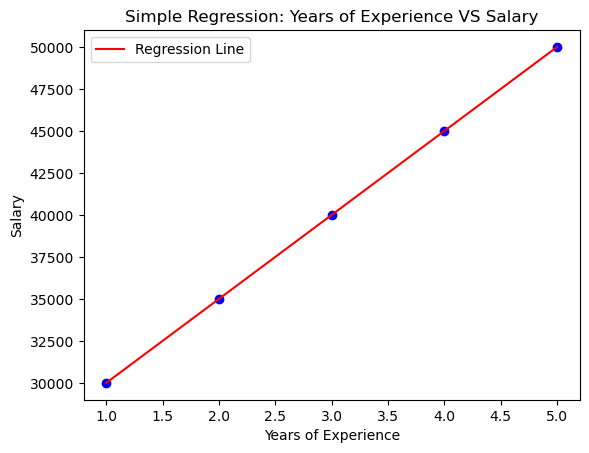

In [57]:
# Plotting Regression line
plt.scatter(years_experience, salary, color='blue')
plt.plot(years_experience, model.predict(years_experience), color='red', label="Regression Line")
plt.legend()
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Simple Regression: Years of Experience VS Salary")
plt.show()

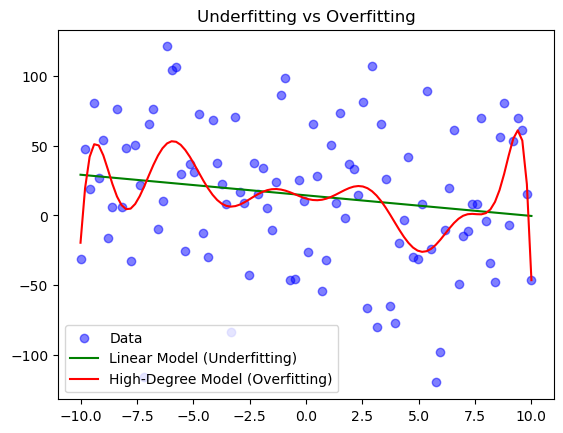

In [59]:
# Underfitting and Overfitting
# Generating quadratic data with noise
x = np.linspace(-10, 10, 100)
y = 0.5 * x ** 2 + 2 + np.random.normal(0, 54, 100)

# Linear Regression Model
poly_features = PolynomialFeatures(degree=15)
x_poly = poly_features.fit_transform(x.reshape(-1, 1))

linear_model = LinearRegression()
linear_model.fit(x.reshape(-1, 1), y)

poly_model = LinearRegression()
poly_model.fit(x_poly, y)

# Plotting results
plt.scatter(x, y, color='blue', alpha=0.5, label="Data")
plt.plot(x, linear_model.predict(x.reshape(-1, 1)), color='green', label="Linear Model (Underfitting)")
plt.plot(x, poly_model.predict(x_poly), color='red', label="High-Degree Model (Overfitting)")
plt.legend()
plt.title("Underfitting vs Overfitting")
plt.show()

In [100]:
# Generating synthetic dataset
np.random.seed(42)
X = np.linspace(1, 10, 100).reshape(-1, 1)  # Feature: 100 samples
y = (3 * X.ravel() + np.random.normal(0, 2, 100))  # Ensure y has 100 samples

# Ensure X and y have the same number of samples
assert X.shape[0] == y.shape[0], "X and y must have the same number of samples!"

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

# Polynomial Regression (degree=2)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X, y)
y_pred_lasso = lasso_model.predict(X)

# Comparing Mean Squared Errors
linear_mse = mean_squared_error(y, y_pred_linear)
poly_mse = mean_squared_error(y, y_pred_poly)
lasso_mse = mean_squared_error(y, y_pred_lasso)

print("Mean Squared Errors:")
print(f"Linear Regression: {linear_mse:.2f}")
print(f"Polynomial Regression: {poly_mse:.2f}")
print(f"Lasso Regression: {lasso_mse:.2f}")

Mean Squared Errors:
Linear Regression: 3.26
Polynomial Regression: 3.25
Lasso Regression: 3.26


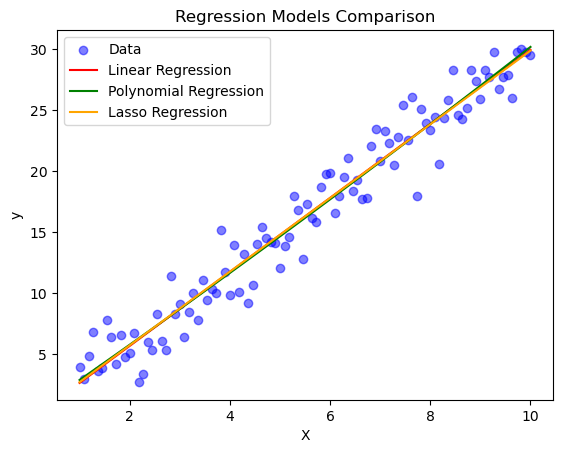

In [102]:
# Visualization
plt.scatter(X, y, color="blue", label="Data", alpha=0.5)
plt.plot(X, y_pred_linear, color="red", label="Linear Regression")
plt.plot(X, poly_model.predict(poly_features.transform(X)), color="green", label="Polynomial Regression")
plt.plot(X, y_pred_lasso, color="orange", label="Lasso Regression")
plt.legend()
plt.title("Regression Models Comparison")
plt.xlabel("X")
plt.ylabel("y")
plt.show()